# Application of Linear Regression on Swedish Auto Insurance Dataset

The Swedish Auto Insurance Dataset involves predicting the total payment for all claims in thousands of Swedish Kronor, given the total number of claims.

It is a regression problem. It is comprised of 63 observations with 1 input variable and one output variable. The variable names are as follows:

* Number of claims.
* Total payment for all claims in thousands of Swedish Kronor.


## Standard Library Includes

We will be importing the below libraries

* **numpy** - NumPy is the fundamental package for scientific computing with Python
* **pandas** - Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data  analysis tools
* **matplotlib** - 2D plotting library which produces publication quality figures in a variety of formats and interactive environments across platforms
* **seaborn** - Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics
* **sklearn** - Library that implements a range of machine learning, preprocessing, cross-validation and visualization algorithms

In [153]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import  metrics
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

%matplotlib inline

## Reading data from excel file

Swedish Auto Insurance Dataset
* [Download](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr06.xls).
* [More Information](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html)

In [154]:
df = pd.read_excel('slr06.xls')

# Lets display the top 5 records in the Dataset
print df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
     X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4


In [155]:
# Checking data type of columns and if any NULL values are present
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB
None


In [156]:
# Displaying basic stats for the columns
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


## Visualization using seaborn and matplotlib

Plotting the distribution of the feature and label from the Dataset.

We can see that the distributions have approximately the same shape which indicates that there is a strong linear relationship between the feature and label.

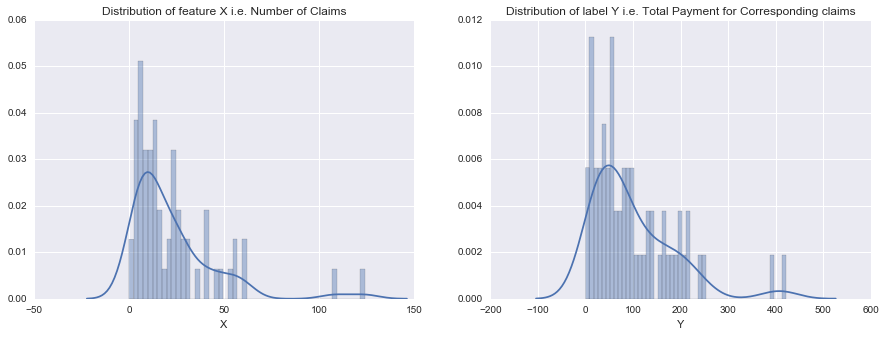

In [157]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.set_title('Distribution of feature X i.e. Number of Claims')
sns.distplot(df.X,bins=50,ax=ax1)

ax2.set_title('Distribution of label Y i.e. Total Payment for Corresponding claims')
sns.distplot(df.Y,bins=50,ax=ax2)

Boxplot and Violinplot gives us the quartile distribution of the feature and check for outliers.

We can see two extreme values but we will include them in our analysis.

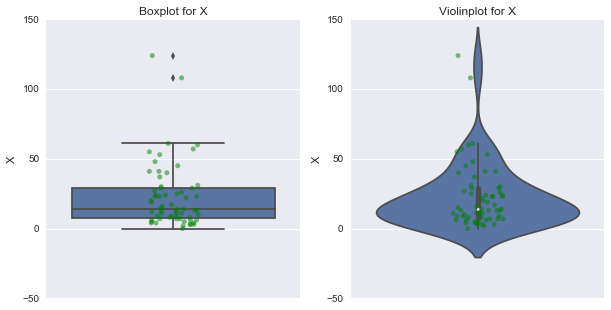

In [158]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.set_ylim(-50,150)
ax1.set_title('Boxplot for X')
sns.boxplot(y='X',data=df,ax=ax1,)
sns.stripplot(y='X',color='green',data=df,jitter=True,ax=ax1,alpha=0.5)

ax2.set_ylim(-50,150)
ax2.set_title('Violinplot for X')
sns.violinplot(y='X',data=df,ax=ax2)
sns.stripplot(y='X',color='green',data=df,jitter=True,ax=ax2,alpha=0.5)

This displays the scatter plot for Feature and Label and fits an approximate regression line for the same.

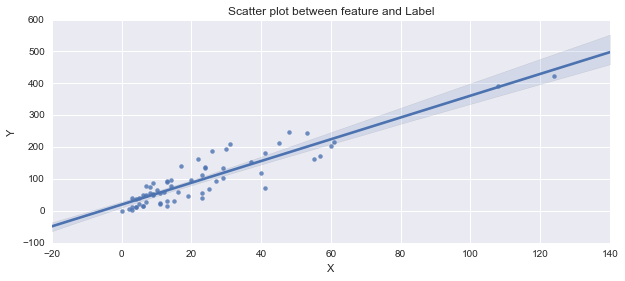

In [159]:
fig , (ax1) = plt.subplots(1,1,figsize=(10,4))

ax1.set_title('Scatter plot between feature and Label')
sns.regplot(data=df,x='X',y='Y',ax=ax1)

## Training Linear Regression Model

Here we will train the Linear Regression model from scikit-learn and check the RMSE for the Training Data itself.

In [160]:
X = pd.DataFrame(df.X)
Y = df.Y
regr = linear_model.LinearRegression()
regr.fit(X,Y)
Y_pred = regr.predict(X)
mse = metrics.mean_squared_error(Y_pred,Y)
print 'RMSE for Training set : %f' % (np.sqrt(mse))

RMSE for Training set : 35.365830


Checking mean RMSE after cross validation

In [161]:
regr_cv = linear_model.LinearRegression()
scores = cross_val_score(regr_cv,X,Y,cv=10,scoring='mean_squared_error')
scores = scores*-1
print 'Mean RMSE for Cross Validation : %f' % (np.mean(np.sqrt(scores)))

Mean RMSE for Cross Validation : 35.634179


Splitting the dataset in Train and Test Sets.

Below Scatter plot will show the distribution of training and testing samples..

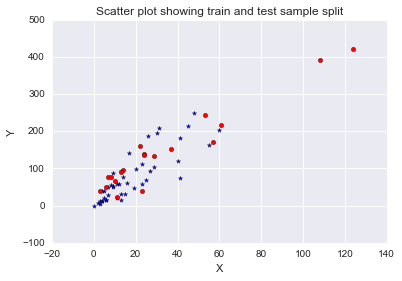

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter plot showing train and test sample split')
ax.scatter(X_train,Y_train,marker='*',label='Train')
ax.scatter(X_test,Y_test,c='red',label='Test')

Train the model on the training set and predict the label values for the testing set.

Looking at the RMSE for testing set.

In [163]:
regr_fin = linear_model.LinearRegression()
regr_fin.fit(X_train,Y_train)
Y_pred = regr_fin.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(Y_pred,Y_test))
print 'RMSE for Testing set : %f' % (rmse)

RMSE for Testing set : 36.121763


Using the coefficient from generated by the model we can plot the regression line on the scatter plot.

We can observe that this closely approximates the data and regression line from the seaborn reg_plot is almost similar to it.

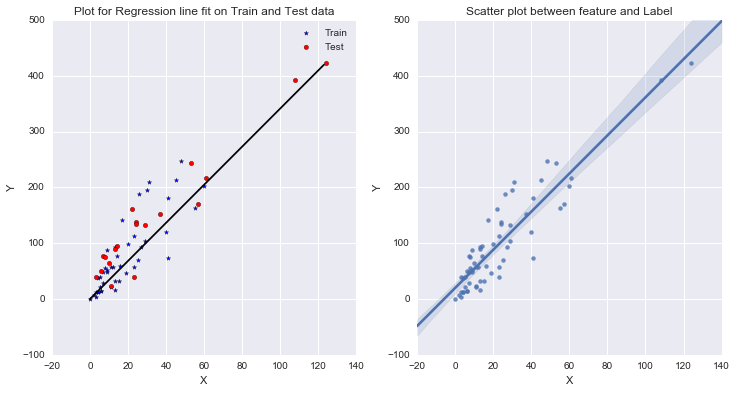

In [164]:
x = range(0,X.max())
y = x*regr.coef_

fig, (ax,ax1) = plt.subplots(1,2,figsize=(12,6))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Plot for Regression line fit on Train and Test data')
ax.scatter(X_train,Y_train,marker='*',label='Train')
ax.scatter(X_test,Y_test,c='red',label='Test')
ax.legend()
ax.plot(x,y,c='black')

ax1.set_title('Scatter plot between feature and Label')
ax1.set_ylim(-100,500)
sns.regplot(data=df,x='X',y='Y',ax=ax1)